In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import scipy.optimize as opt
np.random.seed(seed=233423)

In [2]:
Data = pd.read_csv("Seshat Data.csv")

In [3]:
Data

,NGA,PolID,Time,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,SPC1,MG_corr
0,Big Island Hawaii,Hawaii1,1000,3.854914,4.111759,2.282858,-0.653777,0.090909,0.100000,0.100000,0.100000,1.8,0.203229,0
1,Big Island Hawaii,Hawaii1,1100,3.854914,4.111759,2.282858,-0.653777,0.090909,0.100000,0.100000,0.100000,1.8,0.203229,0
2,Big Island Hawaii,Hawaii2,1200,3.750606,3.337475,3.363416,1.060611,0.090909,0.090909,0.150000,0.000000,1.8,0.222845,0
3,Big Island Hawaii,Hawaii2,1300,4.065673,3.337475,3.429545,0.943410,0.090909,0.090909,0.150000,0.000000,1.8,0.228982,0
4,Big Island Hawaii,Hawaii2,1400,4.192464,3.337475,3.584463,1.993130,0.090909,0.181818,0.150000,0.000000,1.8,0.258405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,Yemeni Coastal Plain,YeRasul,1400,5.881658,6.536808,4.698970,4.500000,0.977778,0.950000,1.000000,1.000000,4.5,0.801720,1
860,Yemeni Coastal Plain,YeTahir,1500,5.454290,5.762184,5.171692,4.500000,0.888889,0.966667,1.000000,1.000000,5.0,0.797062,1
861,Yemeni Coastal Plain,TrOttm3,1600,7.447158,6.684486,5.819190,8.036426,0.990909,0.916667,1.000000,1.000000,5.0,0.958307,1
862,Yemeni Coastal Plain,YeQasmi,1700,5.418268,5.553020,3.661252,3.000000,0.572727,0.272727,0.833333,0.814286,5.0,0.568928,1


## SPC1 Break Point for RelTime


In [4]:
np.median(Data["SPC1"])

0.356081775

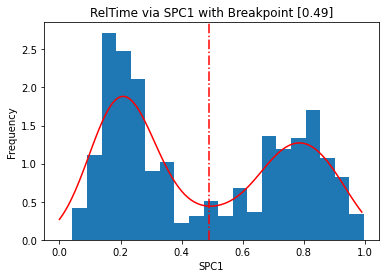

In [5]:
plt.hist(Data["SPC1"], bins = 20, density = True)

x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["SPC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
plt.plot(x, KDE, c="red")
plt.axvline(xmin, linestyle="-.",c="red", )
plt.title("RelTime via SPC1 with Breakpoint "+str(np.round(xmin,2)))
plt.xlabel("SPC1")
plt.ylabel("Frequency")
plt.show()

SPC_Break = xmin

### IDEA

If this is too restrictive, maybe choose the first maximum around 0.2 as the "Time Zero". Aka the first emergence of medium-to-large structure.

PolPop


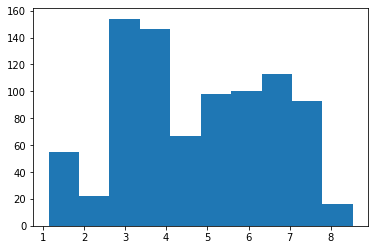

PolTerr


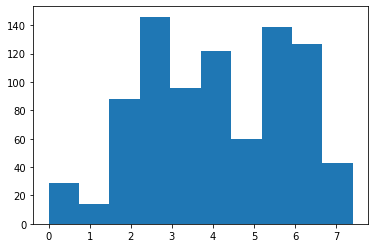

CapPop


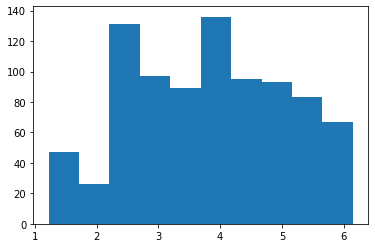

levels


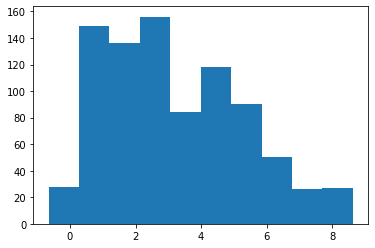

government


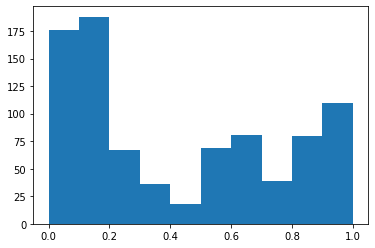

infrastr


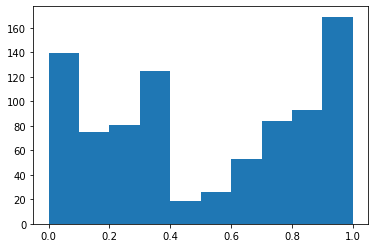

writing


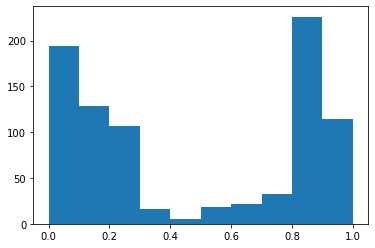

texts


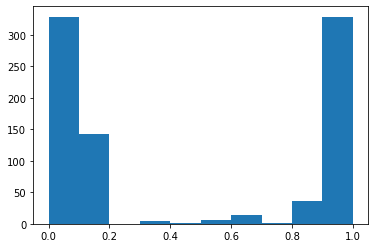

money


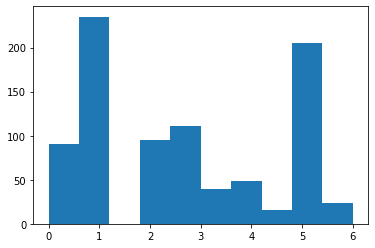

SPC1


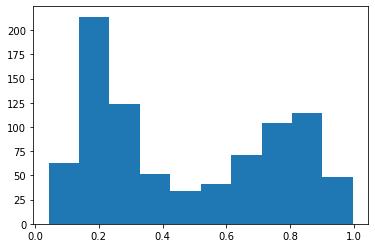

In [6]:
for i in range(3,13):
    print(Data.columns[i])
    plt.hist(Data[Data.columns[i]])
    #plt.set_title(Data.columns[i])
    plt.show()

In [7]:
# Next, we define a relative time scale (RelTime) with 0 at the time when the SPC1 trajectory crosses the 5.3 threshold

In [8]:
NGA = Data["NGA"][0]
print(Data[Data["NGA"] == NGA])

                 NGA    PolID  Time    PolPop   PolTerr    CapPop    levels  \
0  Big Island Hawaii  Hawaii1  1000  3.854914  4.111759  2.282858 -0.653777   
1  Big Island Hawaii  Hawaii1  1100  3.854914  4.111759  2.282858 -0.653777   
2  Big Island Hawaii  Hawaii2  1200  3.750606  3.337475  3.363416  1.060611   
3  Big Island Hawaii  Hawaii2  1300  4.065673  3.337475  3.429545  0.943410   
4  Big Island Hawaii  Hawaii2  1400  4.192464  3.337475  3.584463  1.993130   
5  Big Island Hawaii  Hawaii2  1500  4.599847  3.337475  3.807048  4.564236   
6  Big Island Hawaii  Hawaii2  1600  4.440997  3.337475  2.308375  2.584892   
7  Big Island Hawaii  Hawaii3  1700  5.011752  3.973290  3.442766  3.153204   
8  Big Island Hawaii  USKameh  1800  5.192031  4.226199  4.363033  3.534543   

   government  infrastr   writing  texts  money      SPC1  MG_corr  
0    0.090909  0.100000  0.100000    0.1    1.8  0.203229        0  
1    0.090909  0.100000  0.100000    0.1    1.8  0.203229        0  
2 

In [9]:
NGAlist = list(set(Data["NGA"]))
print(len(NGAlist))
LargeNGAs = []

for NGA in NGAlist:
    Subset = Data[Data["NGA"] == NGA]
    Logical = np.max(Subset["SPC1"]) > SPC_Break # Is this polity large enough to cross the SPC1 threshold?
    print("Is " +NGA+" large enough?",  Logical)
    if Logical:
        LargeNGAs.append(NGA)
    #print(Subset)
print(LargeNGAs)

30
Is Cuzco large enough? [ True]
Is Yemeni Coastal Plain large enough? [ True]
Is Susiana large enough? [ True]
Is Upper Egypt large enough? [ True]
Is Chuuk Islands large enough? [False]
Is Ghanaian Coast large enough? [ True]
Is Valley of Oaxaca large enough? [False]
Is Cahokia large enough? [False]
Is North Colombia large enough? [False]
Is Sogdiana large enough? [ True]
Is Southern China Hills large enough? [False]
Is Oro PNG large enough? [False]
Is Orkhon Valley large enough? [ True]
Is Kachi Plain large enough? [ True]
Is Cambodian Basin large enough? [ True]
Is Kansai large enough? [ True]
Is Middle Yellow River Valley large enough? [ True]
Is Niger Inland Delta large enough? [ True]
Is Konya Plain large enough? [ True]
Is Deccan large enough? [ True]
Is Garo Hills large enough? [False]
Is Iceland large enough? [ True]
Is Lena River Valley large enough? [False]
Is Central Java large enough? [ True]
Is Lowland Andes large enough? [False]
Is Kapuasi Basin large enough? [False]
I

In [10]:
Seshat_Large = Data[Data["NGA"].isin(LargeNGAs)]
print(Seshat_Large)


                      NGA    PolID  Time    PolPop   PolTerr    CapPop  \
33        Cambodian Basin  KhFunaE   300  6.235249  5.409991  3.301030   
34        Cambodian Basin  KhFunaE   400  6.235249  5.409991  3.301030   
35        Cambodian Basin  KhFunaE   500  6.235249  5.409991  3.301030   
36        Cambodian Basin  KhFunaL   600  5.254599  5.421933  3.301030   
37        Cambodian Basin  KhChenl   700  6.393323  5.725095  4.778151   
..                    ...      ...   ...       ...       ...       ...   
859  Yemeni Coastal Plain  YeRasul  1400  5.881658  6.536808  4.698970   
860  Yemeni Coastal Plain  YeTahir  1500  5.454290  5.762184  5.171692   
861  Yemeni Coastal Plain  TrOttm3  1600  7.447158  6.684486  5.819190   
862  Yemeni Coastal Plain  YeQasmi  1700  5.418268  5.553020  3.661252   
863  Yemeni Coastal Plain  YeQasmi  1800  5.418268  5.553020  3.661252   

       levels  government  infrastr   writing     texts  money      SPC1  \
33   2.666667    0.618182  0.977778

## Now for the RelTime


In [64]:
Data_RT = pd.DataFrame(columns = Seshat_Large.columns)
DF_Tzero = pd.DataFrame(columns = ["NGA", "T0"])

# go through the NGAs
for NGA in list(set(Seshat_Large["NGA"])):
    
    # Subset of this NGA's data
    NGA_dat = Seshat_Large[Seshat_Large["NGA"] == NGA]
    # Calculate this NGA's Time Zero
    NGA_TimeZero =NGA_dat["Time"].loc[NGA_dat["SPC1"]> SPC_Break[0]].iloc[0]
    print(NGA,NGA_TimeZero)
    # Shift the Time Scale
    NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
    
    # And combine it to a new Data Frame
    Data_RT = pd.concat([Data_RT, NGA_dat])
    DF_Tzero = pd.concat([DF_Tzero, pd.DataFrame(data={"NGA": [NGA], "T0": [NGA_TimeZero]})])
    print(NGA_dat[["Time", "SPC1"]])
    print(" ________________________ ")

Orkhon Valley 500
     Time      SPC1
524 -1900  0.315541
525 -1800  0.315541
526 -1700  0.315541
527 -1600  0.315541
528 -1500  0.315541
529 -1400  0.315541
530 -1300  0.315541
531 -1200  0.315541
532 -1100  0.315541
533 -1000  0.315541
534  -900  0.327782
535  -800  0.327782
536  -700  0.459248
537  -600  0.459248
538  -500  0.450334
539  -400  0.430392
540  -300  0.430392
541  -200  0.430236
542  -100  0.430236
543     0  0.520649
544   100  0.600909
545   200  0.596967
546   300  0.644542
547   400  0.644542
548   500  0.782909
549   600  0.782909
550   700  0.302733
551   800  0.909591
552   900  0.698625
553  1000  0.698625
554  1100  0.645079
555  1200  0.718817
556  1300  0.992245
557  1400  0.996386
 ________________________ 
Kachi Plain -2500
     Time      SPC1
129 -5000  0.157368
130 -4900  0.157368
131 -4800  0.157368
132 -4700  0.157368
133 -4600  0.157368
..    ...       ...
218  3900  0.710320
219  4000  0.715172
220  4100  0.847881
221  4200  0.894917
222  4300  0.6917

C:\Users\Tobias\AppData\Local\Temp/ipykernel_24084/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_24084/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_24084/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [65]:
DF_Tzero.set_index("NGA", inplace=True)
DF_Tzero.transpose().to_csv("TimeZero.csv")
DF_Tzero.transpose()

NGA,Orkhon Valley,Kachi Plain,Paris Basin,Cuzco,Latium,Cambodian Basin,Kansai,Middle Yellow River Valley,Niger Inland Delta,Konya Plain,Deccan,Susiana,Upper Egypt,Iceland,Yemeni Coastal Plain,Central Java,Ghanaian Coast,Sogdiana
T0,500,-2500,-200,1400,-700,300,400,-1800,1000,-2000,-300,-3700,-3100,1300,400,800,1800,-500


In [12]:
Data_RT.rename(columns={'Time':'RelTime'}, inplace=True)
Data_RT

,NGA,PolID,RelTime,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,SPC1,MG_corr
524,Orkhon Valley,MnXngnE,-1900,4.552769,5.591893,4.007285,2.587429,0.100000,0.075000,0.200000,0.1000,1.0,0.315541,0
525,Orkhon Valley,MnXngnE,-1800,4.552769,5.591893,4.007285,2.587429,0.100000,0.075000,0.200000,0.1000,1.0,0.315541,0
526,Orkhon Valley,MnXngnE,-1700,4.552769,5.591893,4.007285,2.587429,0.100000,0.075000,0.200000,0.1000,1.0,0.315541,0
527,Orkhon Valley,MnXngnE,-1600,4.552769,5.591893,4.007285,2.587429,0.100000,0.075000,0.200000,0.1000,1.0,0.315541,0
528,Orkhon Valley,MnXngnE,-1500,4.552769,5.591893,4.007285,2.587429,0.100000,0.075000,0.200000,0.1000,1.0,0.315541,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,Sogdiana,UzChagt,1800,6.254682,6.544068,4.435574,4.264973,0.527273,0.760000,0.816667,0.9625,5.0,0.743461,1
657,Sogdiana,UzTimur,1900,7.690196,6.740363,5.176091,6.115642,0.827273,0.881818,0.828571,0.9875,5.0,0.872746,1
658,Sogdiana,UzTimur,2000,6.398612,6.545823,5.176091,6.115642,0.827273,0.881818,0.828571,0.9875,5.0,0.841678,1
659,Sogdiana,UzJanid,2100,5.772737,5.222305,4.986987,5.562024,0.862500,0.857143,0.800000,0.9875,5.0,0.779340,1


## Comparison

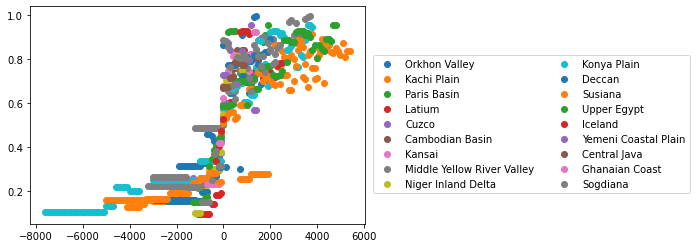

In [13]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.scatter(DF["RelTime"], DF["SPC1"], label=N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

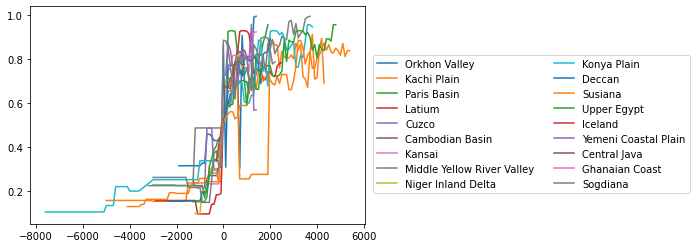

In [14]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"], DF["SPC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

## Fitting

Fit logistic model to the data set. Then, try cross-valdiation by fitting on some time series and predicting the others.

In [15]:
X, y = Data_RT["RelTime"].to_numpy(), Data_RT["SPC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data

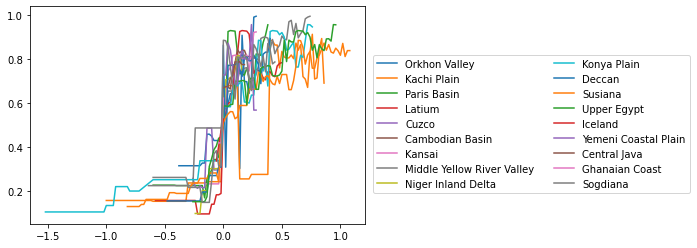

In [16]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"]/T,    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

In [17]:
def f(x, a, b, c, d):
    # the logistic function in its most general shape
    return a / (1. + np.exp(-c * (x - d))) + b

The parameter c (or rather 1/c) corresponds to a time scale of the temporal evolution.

In [18]:
(a_, b_, c_, d_), _ = opt.curve_fit(f, X, y)

p0 = np.array((a_, b_, c_, d_))
print(p0)

[ 5.91641013e-01  1.93784864e-01  1.93749267e+01 -1.54321382e-02]


In [19]:
print(a_, b_, c_, d_)
x_show = np.arange(min(X), max(X)+1000/T,100/T) # evaluate the estimated function here
print(min(x_show), max(x_show))
y_hat = f(x_show, a_, b_, c_, d_)

0.5916410129791869 0.19378486427036443 19.374926686423745 -0.01543213820302337
-1.52 1.2600000000000025


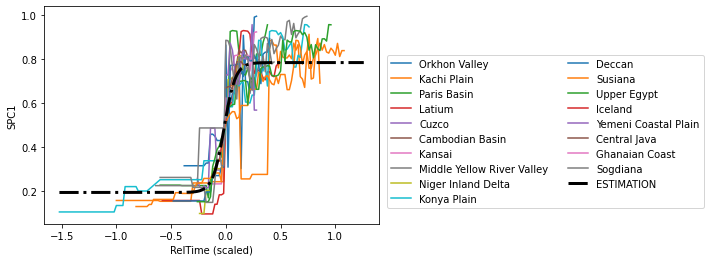

In [20]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"]/T,    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.xlabel("RelTime (scaled)")
plt.ylabel("SPC1")
plt.show()

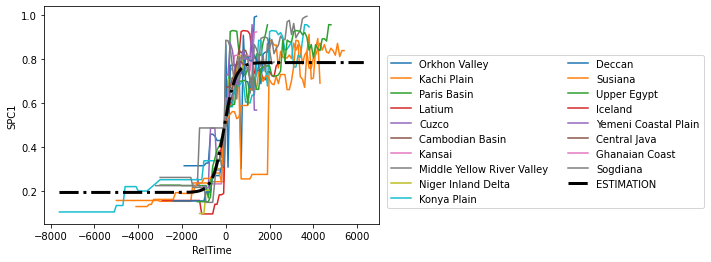

In [21]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.show()

#### Residuals

In [22]:
y_est = f(X,a_, b_, c_, d_)

In [23]:
RMSE = (np.sum((y_est-y)**2) / len(y)  )**0.5
print(RMSE)

0.11299071583112757


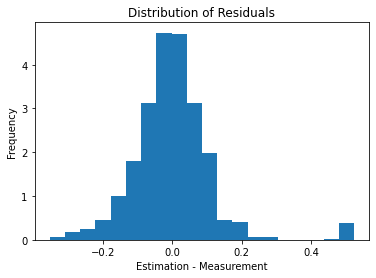

In [24]:
plt.hist(y_est-y,bins = 20, density = True)
plt.title("Distribution of Residuals")
plt.xlabel("Estimation - Measurement")
plt.ylabel("Frequency")
plt.show()

#### Bootstrapping

Will lead to some uncertainty values for our parameters. Hence, we might want to throw away some of them as a possible zero-value (prime candidate for this is the parameter d). The bootstrapped uncertainty for c will tell us more about the range of possible time scales for the temporal evolution and, by judging the width of this uncertainty, if there is a universal time scale.

In [25]:
Data_Reduced = Data_RT[["NGA", "RelTime", "SPC1"]]
NGA_red = list(set(Data_RT["NGA"]))


In [26]:
import random
random.seed(1234)
nBT = 1000 # how many Bootstraps
negCcount = 0

Params = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    NGA_selection = random.choices(NGA_red,k=len(NGA_red))
    Data_Bootstrap = pd.DataFrame(columns = Data_Reduced.columns)

    for n in NGA_selection:
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_Reduced[Data_Reduced["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["SPC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0

    Params = pd.concat([Params,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_]})])
    if c_ < 0:
        print(NGA_selection)
        negCcount +=1
        for N in NGA_selection:
            DF = Data_RT[Data_RT["NGA"] == N]
            plt.plot(DF["RelTime"]/T,    # ALSO normalised
            DF["SPC1"], label=N)
            plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # FOR FULL DATA
            plt.plot(x_show, f(x_show, a_, b_, c_, d_), "-.",c="r", linewidth = 3)

        plt.show()
        
    print(a_, b_, c_, d_)
    print("-----------------")
print(Params.round(2))

0.577661466872459 0.2012628021906385 17.9303175939245 -0.013738830460973251
-----------------
0.5707271196289805 0.18250272144706076 21.174859389069855 -0.018821988180821127
-----------------
0.5787880109626079 0.2258614940820317 23.30169486837513 -0.010748755693610536
-----------------
0.5589839890868801 0.23665432803703168 45.848950989180494 -0.010483173339003421
-----------------
0.5952615827758617 0.19855310080379787 23.5036036593632 -0.015931186908192625
-----------------
0.6503297492337067 0.15888448873992775 7.836005837645499 -0.01800053143872391
-----------------
0.6511452992574729 0.17018362564286293 12.583111616347818 -0.011645734409430378
-----------------
0.6001241210324292 0.18580783297963754 16.81707777384346 -0.009060163725640958
-----------------
0.6031186682197814 0.20050309639075004 17.665115074167144 -0.0163878274547627
-----------------
0.6592470748591819 0.18781142996953235 10.160991321111455 -0.009280191596090857
-----------------
0.5625125610199646 0.184252087540

0.6255493198191927 0.1769690771330949 11.738476465089825 -0.014741296290893532
-----------------
0.5551658581216542 0.22840518790925693 31.330383517519948 -0.014744139870920563
-----------------
0.6254241107907377 0.18147916872347422 13.547396044720696 -0.012438565493236972
-----------------
0.5734338040408471 0.19346929817205763 23.552748590173447 -0.02264063313412833
-----------------
0.5770844912803991 0.19132294637925315 39.454668698405065 -0.018247134783373368
-----------------
0.6238835868264525 0.18460310728453996 16.690835368425645 -0.01340252043994315
-----------------
0.5866744371216476 0.18852678202005213 17.166809600940226 -0.017620342739056508
-----------------
0.5706073128801795 0.1859952781431579 25.66768025033244 -0.013458294634026282
-----------------
0.6467183834218334 0.16671481573580926 11.131219742462841 -0.019769410360025937
-----------------
0.60786391027721 0.1836387009410608 15.463467413915286 -0.01601303740871398
-----------------
0.6754993489885439 0.19110057

0.5761662985248522 0.2039551419138934 30.275555281584595 -0.01814352783442136
-----------------
0.6501233732819092 0.1891857232497779 11.168335644809874 -0.02094305157599606
-----------------
0.6101569672119167 0.19908198184487538 13.569972919607013 -0.019959729182869698
-----------------
0.599215302585359 0.17295188496269898 13.818753930573832 -0.018192382927633807
-----------------
0.6241987848270986 0.18021854580419225 14.439284054848423 -0.006538309651787407
-----------------
0.567739118625892 0.22119823030651195 26.226068041818934 -0.017203170342269553
-----------------
0.6350717954794157 0.18210445367976405 15.36667365956111 -0.010977187571755451
-----------------
0.5523889973777854 0.20437886991586413 38.27155359065289 -0.011389722737584174
-----------------
0.5365222773539328 0.21411191542547173 22.590694813482692 -0.021218260422708732
-----------------
0.617938726207238 0.1933530486033304 18.348427523778533 -0.009631604235524881
-----------------
0.5764673827420561 0.218712674

0.6976180453489125 0.12858295928880067 5.776183401179021 0.012987934518484444
-----------------
0.535907382300813 0.21838209760723418 23.235937650961745 -0.017874921152496576
-----------------
0.5035266206221649 0.2006334572890604 55.35316552942877 -0.017020049164535894
-----------------
0.6563337397227644 0.18307102818112875 9.74558127590133 -0.008025422642085387
-----------------
0.607736174097447 0.1817932864509776 18.8140929994924 -0.014669774954372768
-----------------
0.6331114707887197 0.15913798706304 9.804774918930564 -0.015182388267472842
-----------------
0.6251237239293447 0.16952695288694472 9.250870417758154 -0.00519591103222792
-----------------
0.5558439711721558 0.2056936681413148 41.82246448682165 -0.013259647287533757
-----------------
0.6055738592942965 0.1845488222082083 18.14167465415783 -0.020099539329341713
-----------------
0.5312148458180045 0.19424710064092635 64.15809106713444 -0.01457318170902883
-----------------
0.6361133099095772 0.20213554920649432 13.8

0.5717883362509216 0.21233771743259142 30.425519830413084 -0.015024605641016726
-----------------
0.6975229774578044 0.17615366413667782 9.678999840958982 -0.005288832446319225
-----------------
0.5700739262181292 0.18731870127726102 34.83912578658001 -0.012311733573186762
-----------------
0.595985931912832 0.196727087316843 19.857085761881493 -0.023584324631646423
-----------------
0.638651780651915 0.19810509741420737 13.061887644049255 -0.023646917016218672
-----------------
0.5722503161882972 0.20851830426867213 25.17227059686721 -0.012292076311994783
-----------------
0.6672355828427271 0.16710943096155015 7.6537525745839 -0.008942191427168613
-----------------
0.5611320143640938 0.24278377947793403 29.685618067188994 -0.010736921955653976
-----------------
0.5840860728523096 0.20119269095919456 32.07014722123062 -0.011566132283286417
-----------------
0.6261256659390123 0.18287222779579196 22.589016199739955 -0.0023617070878481513
-----------------
0.5959433239092268 0.168596036

0.5833078972904804 0.18986508188536713 18.09936873039566 -0.018352806468414515
-----------------
0.6344749739501807 0.16511507472030545 28.392490884303008 -0.009496901854537318
-----------------
0.5694749366857182 0.20088326991378533 37.05455270294833 -0.01482311207120155
-----------------
0.6886112630713759 0.157439411884641 7.544592194006414 -0.0034648172924141626
-----------------
0.5484887226168929 0.19743815076674465 39.2206400418107 -0.016291621808489632
-----------------
0.6673299742594209 0.16007035454296228 8.333384401379575 -0.001047578733389647
-----------------
0.554708561188502 0.2025192289254127 32.693449878495414 -0.019837297129054868
-----------------
0.5835712377345411 0.19195708460282165 28.65925680907674 -0.011659983488874018
-----------------
0.5529515669200544 0.1993115331318723 45.13596234827028 -0.01608498665445506
-----------------
0.5643779049523395 0.19351614897704758 27.017787717486275 -0.02127429856057251
-----------------
0.5914078202123477 0.19281621587099

0.6140736521063132 0.19245326339089744 24.665717378241865 -0.010835068901628773
-----------------
0.5758919924544381 0.1837755490804071 19.42647451190332 -0.017909031024959395
-----------------
0.6751137267989429 0.17948360292814913 10.357703623325492 -0.0059944550203038845
-----------------
0.6121284877902918 0.17071286876084354 10.071923774981258 -0.02683672535255457
-----------------
0.5762138340526841 0.18755783393609163 18.279262473252242 -0.017217745991795447
-----------------
0.65889342840323 0.16841917883943036 8.766124157700201 -0.004258773603100552
-----------------
0.6784188135779203 0.14856744860027846 6.513997996840836 -0.008950152378381464
-----------------
0.6755850031712527 0.16383215973501725 8.105662021948373 -0.012502818315185403
-----------------
0.6056001221623081 0.1818749568075013 12.86958870338414 -0.0245483060848449
-----------------
0.6300850713918245 0.16564330390052195 9.590660050411337 -0.02808736629136907
-----------------
0.6151002918061744 0.190016570982

0.5636310470403604 0.18420439723387613 28.77887008347212 -0.022447458764026845
-----------------
0.5720867170542603 0.20456684044887846 21.797443196804142 -0.01831172861129783
-----------------
0.6110330697303004 0.22135965234614588 17.861539791880592 -0.0027754026808312687
-----------------
0.570689509851629 0.18865202732579237 24.925614590985152 -0.018477978364042715
-----------------
0.5947766572172185 0.18580016489528267 15.737713927059495 -0.016602932463025754
-----------------
0.6631296333751375 0.17173998854777578 10.879139925573265 -0.005353960565697545
-----------------
0.6743306914352947 0.17236188181963416 11.892911533259603 -0.006828230433456752
-----------------
0.5645083825806131 0.2223052354296078 35.926631943274536 -0.01536012519334805
-----------------
0.6241860556451021 0.18748767821872198 14.515627067163093 -0.008712771525935645
-----------------
0.6474225822023908 0.17152518957135202 10.055585739334699 -0.01822811770121669
-----------------
0.553251419709001 0.21771

0.5931326086375867 0.18824128504591267 23.30986252909551 -0.013018365230663978
-----------------
0.6883808789497587 0.1492732067491451 7.197735133220877 -0.0035592545224709896
-----------------
0.6011013329405953 0.18674088952867235 24.85596191348215 -0.014395830075992416
-----------------
0.5559341924593 0.22630177337016572 22.897134226660455 -0.01372104768873939
-----------------
0.5894488634569421 0.18184653070239085 22.352007459434986 -0.012394289002128168
-----------------
0.7290317090609159 0.16142388793814597 6.549829835217125 -0.002903928724220888
-----------------
0.6732647583946076 0.15630445619461453 7.530030468611028 -0.009507490708320063
-----------------
0.6009584034212273 0.20490867405384294 12.406694478504045 -0.018507705728519418
-----------------
0.6724583104621894 0.16313311608059897 9.042622318791638 -0.002648331363899045
-----------------
0.5867525505729166 0.1892194462467522 34.22489154416542 -0.013748115719545038
-----------------
0.5965154242983055 0.20110266223

0.6189946527693146 0.1774879259083232 17.611230560022246 -0.01249432922500004
-----------------
0.651812870394981 0.14839008559275008 7.937832455410604 0.00043529653541853704
-----------------
0.5618681875100513 0.17332967519258854 28.10934294738771 -0.01993757383845446
-----------------
0.558856010948716 0.19796251271853704 38.25094246392231 -0.0127607509200039
-----------------
0.5298040817101697 0.22338662943886076 29.329425792744367 -0.016002746761790337
-----------------
0.6377490036036791 0.17630135217580264 12.47969297486608 -0.016115746778785186
-----------------
0.5975830637233696 0.21858073000064357 26.874893474105107 -0.011182688366347851
-----------------
0.5652758771082161 0.20414047676190783 28.883472662440585 -0.01928173058507705
-----------------
0.5912894820102143 0.19961390072637558 22.514384835565952 -0.01782742134738456
-----------------
0.5346475475463499 0.20326506180821052 45.549796054457225 -0.016562926917271056
-----------------
0.6035622790259445 0.20621942127

0.5969754762086332 0.19208423266639307 25.62271338700308 -0.015761349672004463
-----------------
0.5763634427546106 0.19156956090490343 25.479558737134663 -0.017159098249608835
-----------------
0.6826404108535483 0.16493681859420903 8.533064312687031 0.002663310623322615
-----------------
0.6301804122043422 0.17274513198560967 12.440099736317014 -0.007348867688740674
-----------------
0.5661970633479225 0.189319793768717 28.919163355454995 -0.010792890917457748
-----------------
0.642595690635403 0.18785874193855948 14.611412224886601 -0.008616933126054653
-----------------
0.6816917739283872 0.13398842588256193 5.67508514976215 0.03516598464483134
-----------------
0.6203358497511089 0.18161811250135387 12.547813258239746 -0.020785408916481854
-----------------
0.596005860484141 0.19281282311228207 26.927966663529592 -0.009379285175408768
-----------------
0.6014667005823833 0.20959757512149135 22.69897714301824 -0.01736948715653807
-----------------
0.5803415604206276 0.178493695959

0.5967089495758089 0.1937753780557262 23.263700798302274 -0.018663118737729634
-----------------
0.595004585182805 0.19682501752670425 16.356558492496813 -0.020667582253760815
-----------------
0.6749698420300271 0.1610154619169125 6.916208213489079 0.004323026780741665
-----------------
0.5683894292979659 0.21987728366370735 39.50444172379982 -0.012542543761391857
-----------------
0.6033940966767557 0.18573436187670664 18.2831000099865 -0.005623981423100591
-----------------
0.6125699625481735 0.1715408428154498 12.51371392075814 -0.02217940211552184
-----------------
0.6108368577501505 0.19283354157145016 17.229764632911543 -0.01479762261138316
-----------------
0.553091848521809 0.21067332463256808 42.66121081403538 -0.01946281720695414
-----------------
0.6007543821527036 0.1780312234838811 15.792828121471002 -0.022962631962531645
-----------------
0.5921022771988336 0.18064682852162126 28.943433919485297 -0.0077758999317597485
-----------------
0.565136006534516 0.194468560846639

Original estimates:
    
0.59  0.19  19.37  -0.01 

a / (1. + np.exp(-c * (x - d))) + b

In [27]:
print(negCcount)

0


In [28]:
Params.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

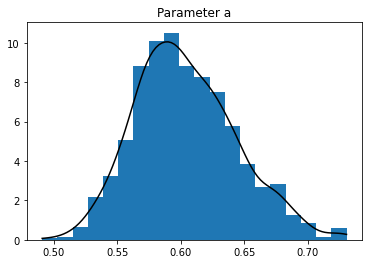

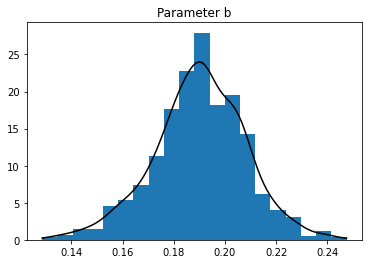

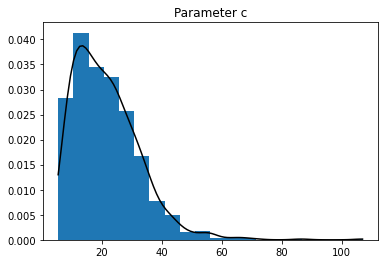

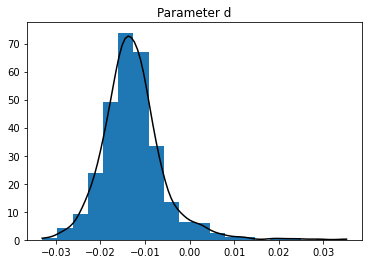

In [29]:
for P in Params.columns:
    
    
    Ps = Params[P]
    P_range = np.linspace(min(Ps), max(Ps),100)
    KDE = gaussian_kde(Ps)(P_range)
    
    plt.hist(Ps,bins=20, density= True)
    plt.plot(P_range, KDE, c="k")
    plt.title("Parameter "+str(P))
    plt.show()

Negative values for c are prevented by setting an initial parameter guess. Otherwise, one can have results with negative C<0 and also A<0 (A, B, C, D) instead of (a,b,c,d) with c>0. Then, via asymptotic behaviour at +/- infinity:

a + b = B
b = A + B

which implies

a = -A

### Analysis of the Curve

When does f(x) = y_est actually change? 
f(-infinity) = b and f(infinity) = a + b. We can now calculate the standard deviations of b and a+b via the bootstrap estimations and check when y_est exceeds b + sd(b) and reaches a+b - sd(a+b).

In [30]:
print(np.mean(Params["b"]), np.std(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]))

Thresh1 = np.mean(Params["b"]) + np.std(Params["b"])
Thresh2 = np.mean(Params["b"]+Params["a"]) - np.std(Params["b"]+Params["a"])
print(Thresh1, Thresh2)
print(min(y_est), max(y_est))

0.1900276515322841 0.017936606166617713
0.7940240201554475 0.030133562560791367
0.2079642576989018 0.7638904575946561
0.19378486427049385 0.7854258768909367


In [31]:
def f1(x):
    # first threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh1)

T1 = opt.root(f1, -0.5)

In [32]:
def f2(x):
    # second threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh2)

T2 = opt.root(f2, 0.5)

C:\Users\Tobias\AppData\Local\Temp/ipykernel_24084/465986300.py:3: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


In [33]:
Timeframe = (T2["x"] -T1["x"])[0]
t_2, t_1 = T2["x"], T1["x"]
# scale this back to original time
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*Timeframe), "years.")

Most of the cultural evolution takes place in a time interval of  1802.0 years.


In [34]:
# 1748
# 1804

## Bootstrapping the Time Interval

Now we can repeat this task, but 

1) check if we actually need the parameter d

2) Calculate the time thresholds T1/T2 for every single Bootstrapped Data and therefore calculate a time interval with standard deviation

##### Testing d

In [35]:
print(np.quantile(Params["d"],0.975))


0.002906384888727877


In [36]:
from statsmodels.stats.weightstats import ztest

ztest(Params["d"], x2=None, value=0, alternative="smaller")
# almost surely not 0, so we keep d

(-57.9942344142545, 0.0)

##### Bootstrap for the Time Interval

In [37]:
def fBT1(x):
    # first threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh1)

def fBT2(x):
    # second threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh2)


In [38]:
random.seed(1234)
nBT = 1000 # how many Bootstraps
Successes = 0

Params2 = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    
    # Select the random NGAs
    NGA_selection = random.choices(NGA_red,k=len(NGA_red))
    Data_Bootstrap = pd.DataFrame(columns = Data_Reduced.columns)

    for n in NGA_selection: # combine them to a data frame
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_Reduced[Data_Reduced["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["SPC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0
    
    # Time Intervals
    T1 = opt.root(fBT1, t_1)
    T2 = opt.root(fBT2, t_2)
    
    # only add results, if opt.root is successful:
    if T1["success"] and T2["success"]:
        Successes += 1
        Params2 = pd.concat([Params2,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_], "T1":T1["x"], "T2":T2["x"]})])    
        print(a_, b_, c_, d_, T1, T2)
        print("-----------------")


0.577661466872459 0.2012628021906385 17.9303175939245 -0.013738830460973251     fjac: array([[-1.]])
     fun: array([3.60822483e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-5.55710478e-11])
       r: array([-0.11876602])
  status: 1
 success: True
       x: array([-0.26164266])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.7985613e-14])
       r: array([-0.26254562])
  status: 1
 success: True
       x: array([0.18828304])
-----------------
0.5952615827758617 0.19855310080379787 23.5036036593632 -0.015931186908192625     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.41668924e-12])
       r: array([-0.21769922])
  status: 1
 success: True
       x: array([-0.19169864])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-3.8191672e-14])
       r:

0.5777066498605369 0.19777785547628046 19.283566013569615 -0.01832721472185808     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.74846812e-12])
       r: array([-0.19296677])
  status: 1
 success: True
       x: array([-0.22680643])     fjac: array([[-1.]])
     fun: array([-3.99680289e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.95608205e-10])
       r: array([-0.21909065])
  status: 1
 success: True
       x: array([0.18331086])
-----------------
0.6134856788202818 0.20717313034793902 22.27018923099567 -0.0073765173282582626     fjac: array([[-1.]])
     fun: array([1.66533454e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.49534274e-11])
       r: array([-0.01759603])
  status: 1
 success: True
       x: array([-0.30607909])     fjac: array([[-1.]])
     fun: array([1.99840144e-15])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([3.63028829e-10])


C:\Users\Tobias\AppData\Local\Temp/ipykernel_24084/465986300.py:3: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([4.05675493e-13])
       r: array([-0.77693139])
  status: 1
 success: True
       x: array([0.14759214])
-----------------
0.6373077101899451 0.1817691251447306 10.974634752870942 -0.01723807154848402     fjac: array([[-1.]])
     fun: array([9.43689571e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.72177134e-10])
       r: array([-0.2756672])
  status: 1
 success: True
       x: array([-0.30423692])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.34343656e-11])
       r: array([-0.55320585])
  status: 1
 success: True
       x: array([0.19743538])
-----------------
0.639716337692966 0.1837910113382483 10.056533677796123 -0.010754509509930014     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-7.99360578e-14])
       r: ar

0.613492052089373 0.19003139735473729 10.3191556606871 -0.018198470418224873     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-1.64816216e-11])
       r: array([-0.17964306])
  status: 1
 success: True
       x: array([-0.35765124])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([4.02500255e-12])
       r: array([-0.38255819])
  status: 1
 success: True
       x: array([0.2408074])
-----------------
0.6067193944015448 0.19287389530490076 17.84724942209036 -0.015349765372652728     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.84297022e-14])
       r: array([-0.26262289])
  status: 1
 success: True
       x: array([-0.22091777])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-3.55271368e-14])
       r: array([-0.59970105]

0.656101388651187 0.16460690490941748 9.286470400673517 -0.0032876002272681872     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.29677388e-13])
       r: array([-0.37602923])
  status: 1
 success: True
       x: array([-0.28848433])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.50990331e-12])
       r: array([-0.4819443])
  status: 1
 success: True
       x: array([0.25040239])
-----------------
0.6202418406042787 0.18384586730310007 15.402135067939758 -0.012215018048103569     fjac: array([[-1.]])
     fun: array([2.10942375e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-2.96320801e-10])
       r: array([-0.35703231])
  status: 1
 success: True
       x: array([-0.22046362])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([2.74547052e-12])
       r: array([-0.57899887

       x: array([-0.21413759])     fjac: array([[-1.]])
     fun: array([-3.33066907e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([6.81767975e-11])
       r: array([-0.1904272])
  status: 1
 success: True
       x: array([0.21126597])
-----------------
0.6467183834218334 0.16671481573580926 11.131219742462841 -0.019769410360025937     fjac: array([[-1.]])
     fun: array([4.46864767e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-5.17353826e-10])
       r: array([-0.42987405])
  status: 1
 success: True
       x: array([-0.26110556])     fjac: array([[-1.]])
     fun: array([-6.66133815e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.66135661e-10])
       r: array([-0.50922687])
  status: 1
 success: True
       x: array([0.20386965])
-----------------
0.60786391027721 0.1836387009410608 15.463467413915286 -0.01601303740871398     fjac: array([[-1.]])
     fun: array([5.44009282e-15])
 message: 'The solution conv

0.6497706935265453 0.1714926604211011 11.471000151293778 -0.026708493660784104     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.20909965e-13])
       r: array([-0.39488289])
  status: 1
 success: True
       x: array([-0.27274798])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.96509475e-14])
       r: array([-0.60001396])
  status: 1
 success: True
       x: array([0.17681398])
-----------------
0.5956855276284286 0.18779339186040125 28.253275931573874 -0.0079350605512396     fjac: array([[-1.]])
     fun: array([-5.55111512e-17])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-2.49543997e-11])
       r: array([-0.55059436])
  status: 1
 success: True
       x: array([-0.12654168])     fjac: array([[-1.]])
     fun: array([1.55431223e-15])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([2.05386597e-10])
       r: arra

0.5926618875387984 0.19875335606397326 28.514454164842764 -0.01161732547565576     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([2.89629432e-13])
       r: array([-0.25856188])
  status: 1
 success: True
       x: array([-0.15710749])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-6.12132567e-11])
       r: array([-0.74840252])
  status: 1
 success: True
       x: array([0.09436336])
-----------------
0.6168786980155737 0.17583575263066384 15.59399600992819 -0.014535387534836557     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-9.16211551e-13])
       r: array([-0.47491782])
  status: 1
 success: True
       x: array([-0.20059681])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.05353529e-12])
       r: array([-0.42847921])
  statu

0.5741024085430816 0.19925756460663127 26.40974143545384 -0.021858892697943517     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([3.02313174e-11])
       r: array([-0.22645343])
  status: 1
 success: True
       x: array([-0.1798852])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-8.63753513e-14])
       r: array([-0.24596236])
  status: 1
 success: True
       x: array([0.13293619])
-----------------
0.6253222679853544 0.18355800829252575 15.720716052063379 -0.005401911181359031     fjac: array([[-1.]])
     fun: array([4.4408921e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-8.33395575e-11])
       r: array([-0.36871056])
  status: 1
 success: True
       x: array([-0.20918499])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.054711

0.6032845459389263 0.1902131322810126 16.564958262928997 -0.023880407918275833     fjac: array([[-1.]])
     fun: array([8.32667268e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-3.22921134e-11])
       r: array([-0.28539535])
  status: 1
 success: True
       x: array([-0.23493282])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([7.52797824e-12])
       r: array([-0.4663736])
  status: 1
 success: True
       x: array([0.15505447])
-----------------
0.6127116778435232 0.19394679370064385 15.95188787384265 -0.01568729233675945     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.05668815e-13])
       r: array([-0.21848946])
  status: 1
 success: True
       x: array([-0.25104796])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([3.10207415e-12])
       r: array([-0.63460987])

0.6352771671616546 0.15820095647644397 11.787258701330735 -0.007965479087106854     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-4.39215331e-12])
       r: array([-0.54062494])
  status: 1
 success: True
       x: array([-0.21710758])     fjac: array([[-1.]])
     fun: array([-1.66533454e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.67612488e-10])
       r: array([-0.3325165])
  status: 1
 success: True
       x: array([0.24815937])
-----------------
0.6162422504028074 0.17640727118391322 11.313717214022493 -0.02240532955678161     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.91532901e-12])
       r: array([-0.33874403])
  status: 1
 success: True
       x: array([-0.28043535])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([6.92844671e-11])
       r: arra

0.6237738859673934 0.19341547609354703 23.229922342485214 -0.009304739262901434     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([5.34194911e-12])
       r: array([-0.33008468])
  status: 1
 success: True
       x: array([-0.170075])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-9.92761429e-13])
       r: array([-1.13233652])
  status: 1
 success: True
       x: array([0.09274268])
-----------------
0.5918453318896817 0.17575079828600013 25.738103871163126 -0.01397887497581484     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([3.41116024e-14])
       r: array([-0.7839857])
  status: 1
 success: True
       x: array([-0.12489982])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([3.78697074e-13])
       r: array([-0.09477985])
  status:

0.6055738592942965 0.1845488222082083 18.14167465415783 -0.020099539329341713     fjac: array([[-1.]])
     fun: array([-3.60822483e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-1.01835179e-10])
       r: array([-0.40836833])
  status: 1
 success: True
       x: array([-0.19722471])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.3211654e-14])
       r: array([-0.45528158])
  status: 1
 success: True
       x: array([0.15049683])
-----------------
0.6361133099095772 0.20213554920649432 13.836530141448275 -0.009562742228785767     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-5.95329341e-13])
       r: array([-0.07991015])
  status: 1
 success: True
       x: array([-0.34804182])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-8.8817842e-15])
       r: arra

0.5937789799345468 0.18251831872086122 12.980407663620113 -0.016418965448451176     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.00950367e-14])
       r: array([-0.31614397])
  status: 1
 success: True
       x: array([-0.25571433])     fjac: array([[-1.]])
     fun: array([-4.4408921e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([8.24805779e-11])
       r: array([-0.15768175])
  status: 1
 success: True
       x: array([0.27996179])
-----------------
0.6099459850576132 0.20426554136266203 14.308369055727708 -0.01080965653998464     fjac: array([[-1.]])
     fun: array([1.05471187e-15])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-8.49192106e-11])
       r: array([-0.05260232])
  status: 1
 success: True
       x: array([-0.36719564])     fjac: array([[-1.]])
     fun: array([-8.43769499e-15])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([7.0277395e-10])
 

0.6521347809011752 0.1725585308550695 13.235331343500325 -0.0007323324903999436     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-8.2032714e-12])
       r: array([-0.44316519])
  status: 1
 success: True
       x: array([-0.21663597])     fjac: array([[-1.]])
     fun: array([-3.33066907e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([5.61444891e-10])
       r: array([-0.72971833])
  status: 1
 success: True
       x: array([0.17113649])
-----------------
0.6351516320020276 0.1982152813992611 18.645240314176117 -0.006574115468251939     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-9.69496705e-12])
       r: array([-0.17898231])
  status: 1
 success: True
       x: array([-0.22975351])     fjac: array([[-1.]])
     fun: array([-7.10542736e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-9.09715636e-10])
 

       x: array([-0.21058557])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([9.9475983e-14])
       r: array([-0.13085808])
  status: 1
 success: True
       x: array([0.21843539])
-----------------
0.6444146164695745 0.17329611591404517 12.066103979835262 -0.01216349987931783     fjac: array([[-1.]])
     fun: array([3.88578059e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.04858094e-10])
       r: array([-0.39580667])
  status: 1
 success: True
       x: array([-0.24978967])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.53452814e-12])
       r: array([-0.59516446])
  status: 1
 success: True
       x: array([0.18636613])
-----------------
0.583625598869578 0.19614025012357164 25.41554739657792 -0.01035670268233217     fjac: array([[-1.]])
     fun: array([-5.55111512e-17])
 message: 'The solution con

0.5959433239092268 0.16859603611255156 14.785838169024368 -0.013130702389775373     fjac: array([[-1.]])
     fun: array([-5.44009282e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-6.44092335e-10])
       r: array([-0.54363437])
  status: 1
 success: True
       x: array([-0.19227802])     fjac: array([[-1.]])
     fun: array([-3.33066907e-16])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([1.44081413e-11])
       r: array([-0.00958424])
  status: 1
 success: True
       x: array([0.44822488])
-----------------
0.6114182708737781 0.19387235512113174 17.280003999794822 -0.009281983443121825     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-5.65880676e-13])
       r: array([-0.23789584])
  status: 1
 success: True
       x: array([-0.2261143])     fjac: array([[-1.]])
     fun: array([1.33226763e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([2.82263102e-10])


       x: array([-0.21459611])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-3.9928727e-11])
       r: array([-0.76363878])
  status: 1
 success: True
       x: array([0.13049856])
-----------------
0.609334306820902 0.1823196521124811 11.837855255310195 -0.016356061944108703     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-5.42035861e-12])
       r: array([-0.29080089])
  status: 1
 success: True
       x: array([-0.28034276])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([7.63807906e-11])
       r: array([-0.31368634])
  status: 1
 success: True
       x: array([0.24061705])
-----------------
0.6982155609687586 0.15319928136832683 7.317494248488516 0.0015005238914764121     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array

0.5815265358342928 0.19175363556105232 22.09101804784161 -0.01207646815449628     fjac: array([[-1.]])
     fun: array([6.9388939e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.18217297e-10])
       r: array([-0.34812446])
  status: 1
 success: True
       x: array([-0.17285303])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.55795377e-11])
       r: array([-0.20407958])
  status: 1
 success: True
       x: array([0.17396128])
-----------------
0.6053216647745036 0.16877023926172208 11.236446672545837 -0.027524519245244017     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.74027459e-14])
       r: array([-0.41188591])
  status: 1
 success: True
       x: array([-0.26517041])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([8.55981952e-13])
       r: array(

0.5953533389332621 0.1858317588023646 28.48571159486745 -0.016005883905163644     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([2.81163981e-14])
       r: array([-0.60702236])
  status: 1
 success: True
       x: array([-0.13024646])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-3.82804899e-13])
       r: array([-0.47833902])
  status: 1
 success: True
       x: array([0.10718847])
-----------------
0.5795778888347808 0.19782304016764637 24.79551150462042 -0.013154076420557619     fjac: array([[-1.]])
     fun: array([2.60902411e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.22847824e-10])
       r: array([-0.2470539])
  status: 1
 success: True
       x: array([-0.17560443])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.93688407e-11])
       r: array(

       x: array([0.21640921])
-----------------
0.5796484789563217 0.20700942403138356 26.00698173455527 -0.012254191877669142     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-4.27574642e-13])
       r: array([-0.02479146])
  status: 1
 success: True
       x: array([-0.25861078])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-2.07722728e-12])
       r: array([-0.5688553])
  status: 1
 success: True
       x: array([0.1106751])
-----------------
0.6400129358143444 0.20229591102969707 16.88202128215105 0.001087953638707076     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-8.62920846e-14])
       r: array([-0.09484564])
  status: 1
 success: True
       x: array([-0.27836288])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-7.70494

       x: array([-0.20629806])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.75637282e-13])
       r: array([-0.19433919])
  status: 1
 success: True
       x: array([0.2348916])
-----------------
0.5885765945941694 0.20308108880681355 17.43898736302141 -0.02052290953753698     fjac: array([[-1.]])
     fun: array([1.38777878e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.62692923e-11])
       r: array([-0.08445143])
  status: 1
 success: True
       x: array([-0.29482677])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-3.8594572e-11])
       r: array([-0.46138628])
  status: 1
 success: True
       x: array([0.15182223])
-----------------
0.6657068820955429 0.17651750793933635 8.447114596978007 0.005122655661537397     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
  

0.6738737261584973 0.14489401156425946 6.743197121678743 0.011345341035168335     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.61093361e-13])
       r: array([-0.38549023])
  status: 1
 success: True
       x: array([-0.32536825])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([4.06341627e-14])
       r: array([-0.33991322])
  status: 1
 success: True
       x: array([0.37067046])
-----------------
0.6017195168698605 0.19154592905957432 20.481685247271432 -0.017194484023358002     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([9.01806407e-13])
       r: array([-0.32709965])
  status: 1
 success: True
       x: array([-0.19167858])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.51940699e-14])
       r: array([-0.572277

0.6062974953301687 0.19040794911635697 19.514666804082136 -0.016233546643749906     fjac: array([[-1.]])
     fun: array([-3.71924713e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-3.67702008e-10])
       r: array([-0.33268147])
  status: 1
 success: True
       x: array([-0.19623013])     fjac: array([[-1.]])
     fun: array([9.99200722e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.86435201e-10])
       r: array([-0.60571745])
  status: 1
 success: True
       x: array([0.13036604])
-----------------
0.582450890927419 0.18851217081629607 19.01855391147483 -0.018896569852133574     fjac: array([[-1.]])
     fun: array([-4.19109192e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-4.13660245e-10])
       r: array([-0.35759171])
  status: 1
 success: True
       x: array([-0.19584605])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.0658141e-14])
 

0.6354419514357732 0.18534508642568379 11.64831557936861 -0.010532641281929616     fjac: array([[-1.]])
     fun: array([3.33066907e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-8.48931758e-11])
       r: array([-0.25409757])
  status: 1
 success: True
       x: array([-0.29377342])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([3.13538084e-12])
       r: array([-0.60340786])
  status: 1
 success: True
       x: array([0.18857612])
-----------------
0.5671259517374534 0.2021475708366719 31.756154901578206 -0.013371785399580983     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([3.35564909e-14])
       r: array([-0.1828211])
  status: 1
 success: True
       x: array([-0.15726645])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.94551058e-12])
       r: array(

0.6128119152756764 0.18683312714697173 13.547896349242361 -0.0075776321038820114     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.42861287e-14])
       r: array([-0.27641071])
  status: 1
 success: True
       x: array([-0.25353611])     fjac: array([[-1.]])
     fun: array([-3.99680289e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.59426608e-10])
       r: array([-0.45614106])
  status: 1
 success: True
       x: array([0.19771351])
-----------------
0.625009126540239 0.18995185519405378 11.512622709958226 -0.007374767537522284     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-5.88418203e-14])
       r: array([-0.20139372])
  status: 1
 success: True
       x: array([-0.31290574])     fjac: array([[-1.]])
     fun: array([-5.55111512e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.64204317e-10])
       r: a

0.6109172412712857 0.1895128957507431 16.184868387126226 -0.011871972528887088     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.91044966e-13])
       r: array([-0.28961338])
  status: 1
 success: True
       x: array([-0.22621756])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.06803455e-13])
       r: array([-0.55601818])
  status: 1
 success: True
       x: array([0.15834184])
-----------------
0.6686850212001282 0.1766016261027588 9.768066148994693 -0.008275106102162672     fjac: array([[-1.]])
     fun: array([7.21644966e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.54488006e-10])
       r: array([-0.29198507])
  status: 1
 success: True
       x: array([-0.31659187])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.01896269e-12])
       r: array([-0.69830133]

0.6631296333751375 0.17173998854777578 10.879139925573265 -0.005353960565697545     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.05866443e-14])
       r: array([-0.37256131])
  status: 1
 success: True
       x: array([-0.26742121])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.37223566e-12])
       r: array([-0.68953951])
  status: 1
 success: True
       x: array([0.18964072])
-----------------
0.6743306914352947 0.17236188181963416 11.892911533259603 -0.006828230433456752     fjac: array([[-1.]])
     fun: array([2.77555756e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-8.89071594e-11])
       r: array([-0.40106227])
  status: 1
 success: True
       x: array([-0.24958349])     fjac: array([[-1.]])
     fun: array([-8.54871729e-15])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([8.74210593e-10])
       r: arr

0.6015627669010719 0.19595758266829294 19.998209974824874 -0.009398727959362923     fjac: array([[-1.]])
     fun: array([4.52415883e-15])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([2.69634925e-10])
       r: array([-0.23531563])
  status: 1
 success: True
       x: array([-0.20411151])     fjac: array([[-1.]])
     fun: array([2.22044605e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-9.67634861e-11])
       r: array([-0.63494217])
  status: 1
 success: True
       x: array([0.13194332])
-----------------
0.6143378266465126 0.1903476900884944 13.417442883302245 -0.016325609899260508     fjac: array([[-1.]])
     fun: array([1.38777878e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-4.47907822e-11])
       r: array([-0.22959194])
  status: 1
 success: True
       x: array([-0.27886523])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.20514

0.6036039938705059 0.19595834082550362 34.154728188995705 -0.014658286802966826     fjac: array([[-1.]])
     fun: array([-7.21644966e-16])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([1.10839088e-10])
       r: array([-0.40190524])
  status: 1
 success: True
       x: array([-0.12876922])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-1.56097357e-13])
       r: array([-1.14636019])
  status: 1
 success: True
       x: array([0.0663741])
-----------------
0.610569584681794 0.18796240442971565 12.858158930270777 -0.011888621928821588     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-8.22789059e-12])
       r: array([-0.24876198])
  status: 1
 success: True
       x: array([-0.27516577])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([4.71844785e-14])
       r: array([-0.42015

0.6124685404814225 0.1833232653016945 17.408551373321146 -0.016650042663489465     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-1.58674185e-11])
       r: array([-0.41170532])
  status: 1
 success: True
       x: array([-0.19886062])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([3.16413562e-14])
       r: array([-0.52642968])
  status: 1
 success: True
       x: array([0.15001272])
-----------------
0.5884564642514509 0.2034713246161426 32.03282132316172 -0.013919554688414559     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([3.89135946e-12])
       r: array([-0.14282269])
  status: 1
 success: True
       x: array([-0.16586786])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-1.51525459e-11])
       r: array([-0.855324

0.6011013329405953 0.18674088952867235 24.85596191348215 -0.014395830075992416     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([8.74023076e-13])
       r: array([-0.50890145])
  status: 1
 success: True
       x: array([-0.14747114])     fjac: array([[-1.]])
     fun: array([2.22044605e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-5.55111512e-15])
       r: array([-0.57162178])
  status: 1
 success: True
       x: array([0.11362414])
-----------------
0.5894488634569421 0.18184653070239085 22.352007459434986 -0.012394289002128168     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([1.10800258e-13])
       r: array([-0.55791696])
  status: 1
 success: True
       x: array([-0.1497982])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([4.26325641e-14])
       r: array([-0.163435

       x: array([0.25717652])
-----------------
0.5943504340571698 0.18988311118038656 16.479819174104822 -0.014789184988877352     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.4466206e-13])
       r: array([-0.28890918])
  status: 1
 success: True
       x: array([-0.22484642])     fjac: array([[-1.]])
     fun: array([-2.66453526e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.90376723e-10])
       r: array([-0.32377872])
  status: 1
 success: True
       x: array([0.18787694])
-----------------
0.5869856365876446 0.20404956064417448 21.96810623570992 -0.01651569377991279     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.98130401e-12])
       r: array([-0.08542504])
  status: 1
 success: True
       x: array([-0.24428093])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: arra

0.6391170756456603 0.15348312172489703 8.132295332280494 -0.0055319060267701135     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-5.72319969e-14])
       r: array([-0.40528861])
  status: 1
 success: True
       x: array([-0.29734802])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([6.08979533e-11])
       r: array([-0.22298874])
  status: 1
 success: True
       x: array([0.37036321])
-----------------
0.6154740235093386 0.20422658011762082 19.218659799629236 -0.014644379391799286     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-3.07856518e-12])
       r: array([-0.07139704])
  status: 1
 success: True
       x: array([-0.27989893])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-7.63811236e-12])
       r: array([-0.97533544])
  s

0.5790684208855361 0.19229986087337728 30.686513164429467 -0.019570441054044752     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([1.0055845e-12])
       r: array([-0.46768282])
  status: 1
 success: True
       x: array([-0.13631901])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-7.43849426e-15])
       r: array([-0.22650513])
  status: 1
 success: True
       x: array([0.1217451])
-----------------
0.640348951815867 0.16621349975321334 8.376173478150942 -0.0018847112390558023     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-9.51272394e-12])
       r: array([-0.32691061])
  status: 1
 success: True
       x: array([-0.31979515])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([2.54241073e-14])
       r: arra

0.579059117972593 0.19864479796194456 35.279389665586706 -0.015941877906313316     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([-7.90867372e-13])
       r: array([-0.32349316])
  status: 1
 success: True
       x: array([-0.13252765])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([3.26405569e-14])
       r: array([-0.47570504])
  status: 1
 success: True
       x: array([0.08926451])
-----------------
0.6011953066504213 0.17876550359851184 14.759140947119533 -0.020274246150347383     fjac: array([[-1.]])
     fun: array([3.80251386e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-4.57342414e-10])
       r: array([-0.4100217])
  status: 1
 success: True
       x: array([-0.22184471])     fjac: array([[-1.]])
     fun: array([-7.77156117e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.22856947e-10])


0.5783816287322571 0.19446359021011494 24.315119488659395 -0.014043244930281248     fjac: array([[-1.]])
     fun: array([-1.33226763e-15])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.66860747e-10])
       r: array([-0.32061034])
  status: 1
 success: True
       x: array([-0.16760514])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([4.85167462e-14])
       r: array([-0.21436503])
  status: 1
 success: True
       x: array([0.15673301])
-----------------
0.5996351382649189 0.17520184648985135 12.964725572463818 -0.02226188783235422     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.29197494e-11])
       r: array([-0.40154878])
  status: 1
 success: True
       x: array([-0.24215493])     fjac: array([[-1.]])
     fun: array([-2.44249065e-15])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([2.18817853e-10])


0.5801184964955134 0.20687987973778657 22.813903942362433 -0.011008606776966853     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-3.20576898e-14])
       r: array([-0.02469266])
  status: 1
 success: True
       x: array([-0.28629489])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.47690757e-13])
       r: array([-0.5061825])
  status: 1
 success: True
       x: array([0.12848566])
-----------------
0.6299625418382473 0.2056222687179798 13.384577473242835 -0.015668394851706166     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-1.85962357e-15])
       r: array([-0.03123])
  status: 1
 success: True
       x: array([-0.43338313])     fjac: array([[-1.]])
     fun: array([2.55351296e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([5.09090547e-10])
       r: array

       x: array([-0.31363868])     fjac: array([[-1.]])
     fun: array([-2.22044605e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.49468129e-10])
       r: array([-0.62656359])
  status: 1
 success: True
       x: array([0.23330768])
-----------------
0.6301804122043422 0.17274513198560967 12.440099736317014 -0.007348867688740674     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-8.27643509e-13])
       r: array([-0.41364361])
  status: 1
 success: True
       x: array([-0.23459038])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([9.12603326e-14])
       r: array([-0.45552097])
  status: 1
 success: True
       x: array([0.21110605])
-----------------
0.642595690635403 0.18785874193855948 14.611412224886601 -0.008616933126054653     fjac: array([[-1.]])
     fun: array([1.30451205e-15])
 message: 'The solution converged.'


       x: array([-0.20858853])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([6.23390228e-13])
       r: array([-0.22255473])
  status: 1
 success: True
       x: array([0.1694396])
-----------------
0.593692283866622 0.1782478783995871 25.98677203625788 -0.008881254308277606     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([6.55195342e-12])
       r: array([-0.7335803])
  status: 1
 success: True
       x: array([-0.12214323])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.19904087e-14])
       r: array([-0.20634952])
  status: 1
 success: True
       x: array([0.15609015])
-----------------
0.6095561769936563 0.19253722752308725 28.769539525123136 -0.007214147441126957     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 17
     

0.6271713283451792 0.18517841968176585 11.417259532338493 -0.011198218630403855     fjac: array([[-1.]])
     fun: array([6.9388939e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.35329553e-10])
       r: array([-0.25070151])
  status: 1
 success: True
       x: array([-0.29831379])     fjac: array([[-1.]])
     fun: array([-1.99840144e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([3.39356099e-10])
       r: array([-0.51052595])
  status: 1
 success: True
       x: array([0.20602387])
-----------------
0.6291241209802027 0.19602722068839815 17.468393543960033 -0.013142076800958895     fjac: array([[-1.]])
     fun: array([3.35842465e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.65065192e-10])
       r: array([-0.20456695])
  status: 1
 success: True
       x: array([-0.23900865])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.38284956e-12])
 

0.5968275543938965 0.20732096341314846 21.18330024828827 -0.011116358399330756     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-7.96612776e-13])
       r: array([-0.01361244])
  status: 1
 success: True
       x: array([-0.33362053])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([2.59792188e-14])
       r: array([-0.79527438])
  status: 1
 success: True
       x: array([0.11287196])
-----------------
0.6372766051007351 0.16743331273664722 11.538218823476651 -0.0005079910304900086     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.94955163e-13])
       r: array([-0.43791198])
  status: 1
 success: True
       x: array([-0.23359641])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([4.58355576e-12])
       r: array([-0.44081614])
  sta

0.6363492351041059 0.18941594897671568 13.999107221545254 -0.01245716165127209     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.30986888e-12])
       r: array([-0.25209128])
  status: 1
 success: True
       x: array([-0.26288654])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([8.90953977e-13])
       r: array([-0.78196772])
  status: 1
 success: True
       x: array([0.14672041])
-----------------
0.633584786501358 0.18690747748222994 14.340601051921354 -0.010823978166099387     fjac: array([[-1.]])
     fun: array([2.69229083e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.89488877e-10])
       r: array([-0.29193392])
  status: 1
 success: True
       x: array([-0.24584705])     fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-1.05643827e-10])
       r: arra

0.650167897572012 0.19047775358946192 12.540235202742938 -0.004994056654395667     fjac: array([[-1.]])
     fun: array([1.74860126e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.13845552e-10])
       r: array([-0.21338885])
  status: 1
 success: True
       x: array([-0.29115596])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([6.37756514e-12])
       r: array([-0.84889793])
  status: 1
 success: True
       x: array([0.15536854])
-----------------
0.6467044476752621 0.19630124653932746 13.126776555433304 -0.0012800741308604702     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-4.77728967e-13])
       r: array([-0.15033673])
  status: 1
 success: True
       x: array([-0.3057926])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([2.20934382e-14])


In [39]:
print(Successes)
print(Params2.round(2))

727
       a     b      c     d    T1    T2
0   0.58  0.20  17.93 -0.01 -0.26  0.19
0   0.60  0.20  23.50 -0.02 -0.19  0.11
0   0.65  0.16   7.84 -0.02 -0.34  0.31
0   0.65  0.17  12.58 -0.01 -0.23  0.17
0   0.60  0.19  16.82 -0.01 -0.20  0.19
..   ...   ...    ...   ...   ...   ...
0   0.66  0.16   9.17 -0.02 -0.30  0.25
0   0.65  0.16   9.88 -0.01 -0.27  0.24
0   0.64  0.16  10.87 -0.01 -0.25  0.25
0   0.62  0.19  20.86 -0.01 -0.18  0.11
0   0.62  0.19  12.42 -0.01 -0.31  0.18

[727 rows x 6 columns]


In [40]:
np.mean(Params2["T2"]-Params2["T1"]), np.std(Params2["T2"]-Params2["T1"])

(0.42098578478309356, 0.13106000466283227)

In [41]:
TimeframeBT = Params2["T2"]-Params2["T1"]
np.mean(TimeframeBT)

0.42098578478309356

In [42]:
# times T for the transformation to years
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*np.mean(TimeframeBT)),
      u"\u00B1",np.round(T*np.std(TimeframeBT)), "years.")

Most of the cultural evolution takes place in a time interval of  2105.0 ± 655.0 years.


In [43]:
# 1979 plus/minus 612
# 2116.0 ± 642.0

In [44]:
T2_scaled, T1_scaled = np.mean(Params2["T2"])*T, T*np.mean(Params2["T1"])

T1_start_scaled = T*np.mean(Params2["T1"]) - T*np.std(Params2["T1"])
T2_end_scaled = T*np.mean(Params2["T2"]) + T*np.std(Params2["T2"])

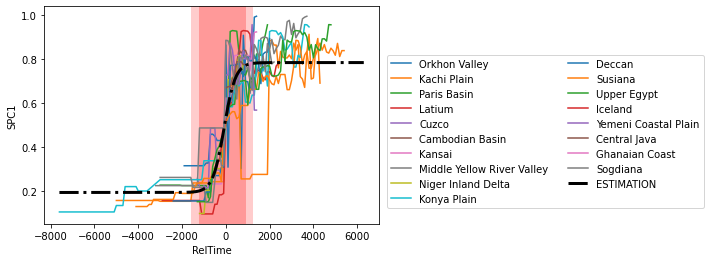

In [46]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
plt.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
plt.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)
plt.savefig("SPC1_Time_Interval")
plt.show()